In [5]:
import numpy as np
import pandas as pd
import seaborn
import json
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

path_to_folder = "./Project_Logs/"

In [2]:
subjects = glob.glob(path_to_folder + "*/")

In [3]:
controller_fps = []
controller_tps = []
hand_fps = []
hand_tps = []

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for file in files:
        if "Controller_FPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            controller_fps.append(df)
        elif "Controller_TPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            controller_tps.append(df)
        elif "MotionCapture_FPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            hand_fps.append(df)
        elif "MotionCapture_TPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            hand_tps.append(df)

./Project_Logs\Antoine\
./Project_Logs\Thomas\
./Project_Logs\Yann\


In [17]:
controller_fps[0].keys()

Index(['absoluteTime', 'clutch', 'collision', 'controlPosition.x',
       'controlPosition.y', 'controlPosition.z', 'controlSpeed.x',
       'controlSpeed.y', 'controlSpeed.z', 'desiredYawRate',
       'differentialTime', 'dronePosition.x', 'dronePosition.y',
       'dronePosition.z', 'droneSpeed.x', 'droneSpeed.y', 'droneSpeed.z',
       'mocapPosition.x', 'mocapPosition.y', 'mocapPosition.z',
       'mocapQuaternion.w', 'mocapQuaternion.x', 'mocapQuaternion.y',
       'mocapQuaternion.z'],
      dtype='object')

<IPython.core.display.Javascript object>


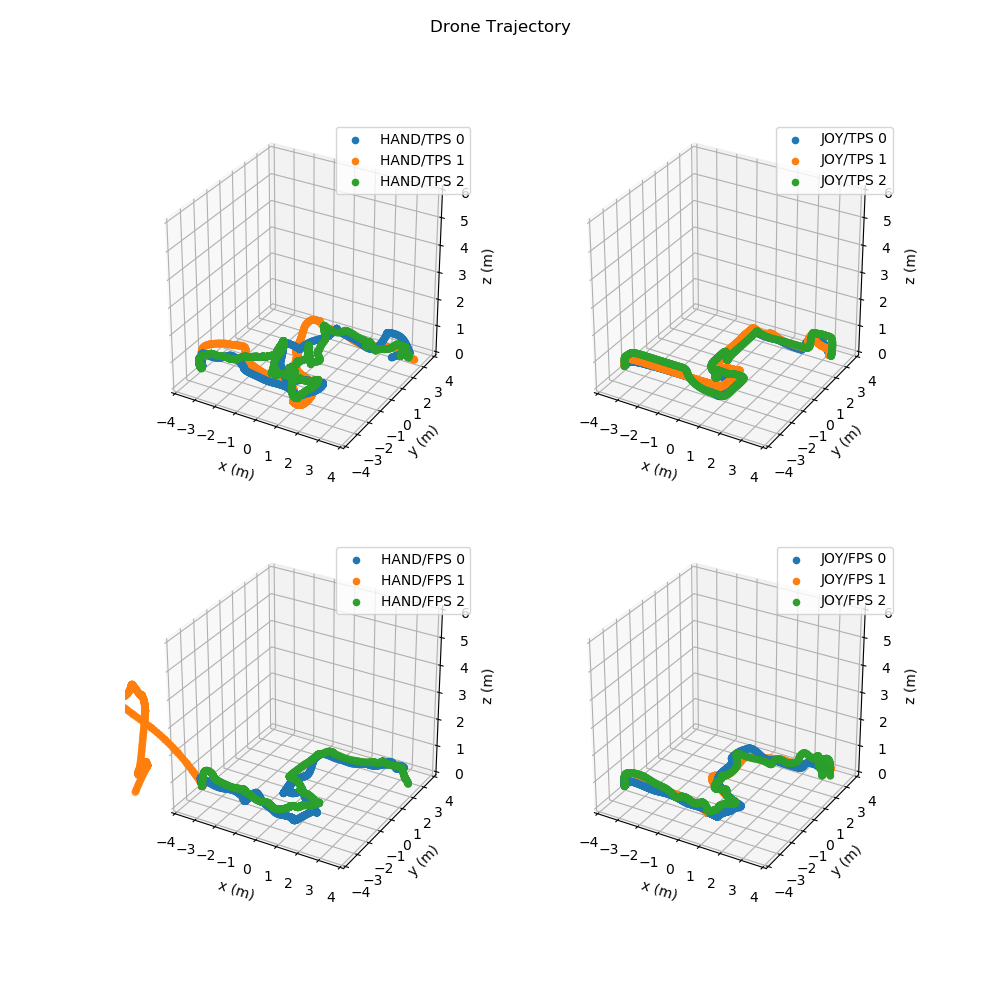

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(hand_tps[0]['dronePosition.x'],hand_tps[0]['dronePosition.z'],hand_tps[0]['dronePosition.y'], label='HAND/TPS 0')
ax.scatter(hand_tps[1]['dronePosition.x'],hand_tps[1]['dronePosition.z'],hand_tps[1]['dronePosition.y'], label='HAND/TPS 1')
ax.scatter(hand_tps[2]['dronePosition.x'],hand_tps[2]['dronePosition.z'],hand_tps[2]['dronePosition.y'], label='HAND/TPS 2')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(222, projection='3d')
ax.scatter(controller_tps[0]['dronePosition.x'],controller_tps[0]['dronePosition.z'],controller_tps[0]['dronePosition.y'], label='JOY/TPS 0')
ax.scatter(controller_tps[1]['dronePosition.x'],controller_tps[1]['dronePosition.z'],controller_tps[1]['dronePosition.y'], label='JOY/TPS 1')
ax.scatter(controller_tps[2]['dronePosition.x'],controller_tps[2]['dronePosition.z'],controller_tps[2]['dronePosition.y'], label='JOY/TPS 2')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(223, projection='3d')
ax.scatter(hand_fps[0]['dronePosition.x'],hand_fps[0]['dronePosition.z'],hand_fps[0]['dronePosition.y'], label='HAND/FPS 0')
ax.scatter(hand_fps[1]['dronePosition.x'],hand_fps[1]['dronePosition.z'],hand_fps[1]['dronePosition.y'], label='HAND/FPS 1')
ax.scatter(hand_fps[2]['dronePosition.x'],hand_fps[2]['dronePosition.z'],hand_fps[2]['dronePosition.y'], label='HAND/FPS 2')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(224, projection='3d')
ax.scatter(controller_fps[0]['dronePosition.x'],controller_fps[0]['dronePosition.z'],controller_fps[0]['dronePosition.y'], label='JOY/FPS 0')
ax.scatter(controller_fps[1]['dronePosition.x'],controller_fps[1]['dronePosition.z'],controller_fps[1]['dronePosition.y'], label='JOY/FPS 1')
ax.scatter(controller_fps[2]['dronePosition.x'],controller_fps[2]['dronePosition.z'],controller_fps[2]['dronePosition.y'], label='JOY/FPS 2')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

fig.suptitle('Drone Trajectory')
plt.show()



<IPython.core.display.Javascript object>


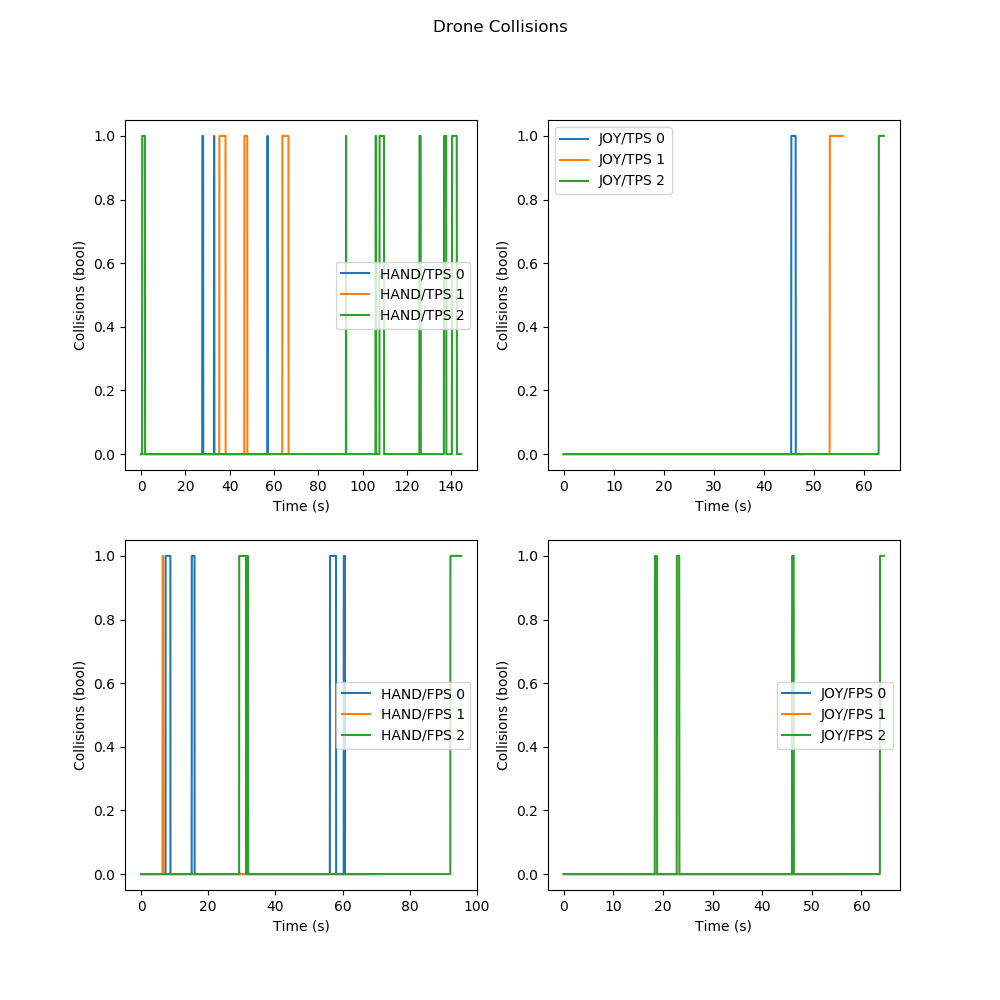

In [46]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.plot(hand_tps[0]['absoluteTime'],hand_tps[0]['collision'], label='HAND/TPS 0')
ax.plot(hand_tps[1]['absoluteTime'],hand_tps[1]['collision'], label='HAND/TPS 1')
ax.plot(hand_tps[2]['absoluteTime'],hand_tps[2]['collision'], label='HAND/TPS 2')
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(222)
ax.plot(controller_tps[0]['absoluteTime'],controller_tps[0]['collision'], label='JOY/TPS 0')
ax.plot(controller_tps[1]['absoluteTime'],controller_tps[1]['collision'], label='JOY/TPS 1')
ax.plot(controller_tps[2]['absoluteTime'],controller_tps[2]['collision'], label='JOY/TPS 2')
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(223)
ax.plot(hand_fps[0]['absoluteTime'],hand_fps[0]['collision'], label='HAND/FPS 0')
ax.plot(hand_fps[1]['absoluteTime'],hand_fps[1]['collision'], label='HAND/FPS 1')
ax.plot(hand_fps[2]['absoluteTime'],hand_fps[2]['collision'], label='HAND/FPS 2')
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(224)
ax.plot(controller_fps[0]['absoluteTime'],controller_fps[0]['collision'], label='JOY/FPS 0')
ax.plot(controller_fps[1]['absoluteTime'],controller_fps[1]['collision'], label='JOY/FPS 1')
ax.plot(controller_fps[2]['absoluteTime'],controller_fps[2]['collision'], label='JOY/FPS 2')
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

fig.suptitle('Drone Collisions')
plt.show()

